In [ ]:
import plotly.express as px
import pandas as pd
import numpy as np
import os
import random



In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,BatchNormalization,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img,img_to_array
# inception_weights_path = 'https://github.com/fchollet/deep-learning-models/releases/download/v0.2/inception_v3_weights_tf_dim_ordering_tf_kernels.h5'


### Inceptionv3 is cnn is advanced version of resnet50 and Inceptionv2 it has 7x7 convulational layers .


Data Preparation


In [ ]:
!git clone https://github.com/laxmimerit/male-female-face-dataset.git

Cloning into 'male-female-face-dataset'...
remote: Enumerating objects: 58657, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 58657 (delta 0), reused 0 (delta 0), pack-reused 58656
Receiving objects: 100% (58657/58657), 261.44 MiB | 11.54 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Checking out files: 100% (58659/58659), done.


Putting some hyperparameters


In [ ]:
epochs = 50
lr= 1e-3 #learning rate
batch_size = 128
data = []
labels = []

image widht and height taking


In [ ]:
size = 224

In [ ]:
## Image Data Generator
# image need to be converted in numerical daTA

In [ ]:
train_datagen = ImageDataGenerator(horizontal_flip=True, width_shift_range=0.4,
                                   height_shift_range=0.4,zoom_range=0.3,
                                   rotation_range=20,rescale = 1/255)

In [ ]:
test_datagen = ImageDataGenerator(rescale=1/255)

In [ ]:
target_size = (size,size)
#(224,224)
target_size

(224, 224)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    directory = '/content/male-female-face-dataset/Training',
    target_size = target_size,
    batch_size=batch_size,
    class_mode='binary'  #two classes are there male and female

)

Found 47009 images belonging to 2 classes.


In [ ]:
validation_generator = test_datagen.flow_from_directory(
    directory = '/content/male-female-face-dataset/Validation',
     target_size = target_size,
     batch_size=batch_size,
     class_mode='binary' 

)

Found 11649 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'female': 0, 'male': 1}

In [ ]:
len(train_generator.classes)

47009

In [ ]:
train_generator.class_mode

'binary'

In [ ]:
X,y = train_generator.next()

In [ ]:
X

array([[[[0.47058827, 0.32941177, 0.26666668],
         [0.4686563 , 0.3274798 , 0.26473472],
         [0.46274513, 0.32156864, 0.25882354],
         ...,
         [0.56078434, 0.4901961 , 0.43529415],
         [0.56078434, 0.4901961 , 0.43529415],
         [0.56078434, 0.4901961 , 0.43529415]],

        [[0.47058827, 0.32941177, 0.26666668],
         [0.46838066, 0.32720417, 0.26445907],
         [0.46274513, 0.32156864, 0.25882354],
         ...,
         [0.56078434, 0.4901961 , 0.43529415],
         [0.56078434, 0.4901961 , 0.43529415],
         [0.56078434, 0.4901961 , 0.43529415]],

        [[0.44845352, 0.30506355, 0.24231844],
         [0.44557178, 0.30239525, 0.23965016],
         [0.43773317, 0.29477012, 0.23202503],
         ...,
         [0.56078434, 0.4901961 , 0.43529415],
         [0.56078434, 0.4901961 , 0.43529415],
         [0.56078434, 0.4901961 , 0.43529415]],

        ...,

        [[0.59607846, 0.3647059 , 0.30980393],
         [0.59564114, 0.36410454, 0.3091479 ]

In [ ]:
X.shape
#batch_size img_size 3dimensional

(128, 224, 224, 3)

In [ ]:
X[0]
#rgb

array([[[0.47058827, 0.32941177, 0.26666668],
        [0.4686563 , 0.3274798 , 0.26473472],
        [0.46274513, 0.32156864, 0.25882354],
        ...,
        [0.56078434, 0.4901961 , 0.43529415],
        [0.56078434, 0.4901961 , 0.43529415],
        [0.56078434, 0.4901961 , 0.43529415]],

       [[0.47058827, 0.32941177, 0.26666668],
        [0.46838066, 0.32720417, 0.26445907],
        [0.46274513, 0.32156864, 0.25882354],
        ...,
        [0.56078434, 0.4901961 , 0.43529415],
        [0.56078434, 0.4901961 , 0.43529415],
        [0.56078434, 0.4901961 , 0.43529415]],

       [[0.44845352, 0.30506355, 0.24231844],
        [0.44557178, 0.30239525, 0.23965016],
        [0.43773317, 0.29477012, 0.23202503],
        ...,
        [0.56078434, 0.4901961 , 0.43529415],
        [0.56078434, 0.4901961 , 0.43529415],
        [0.56078434, 0.4901961 , 0.43529415]],

       ...,

       [[0.59607846, 0.3647059 , 0.30980393],
        [0.59564114, 0.36410454, 0.3091479 ],
        [0.5647059 , 0

Building ML model


In [ ]:
model = Sequential()
model.add(InceptionV3(include_top=False,pooling='avg',weights = 'imagenet'))
model.add(Flatten())

model.add(BatchNormalization())
model.add(Dense(2048, activation='relu'))  #2048 dense layers
model.add(BatchNormalization())


model.add(Dense(1024, activation='relu'))  #1024 dense layers
model.add(BatchNormalization())

model.add(Dense(1, activation='sigmoid'))  #final layer sigmoid gives the probability of the female and male
model.add(BatchNormalization())

model.layers[0].trainable=False #because we don't want to train top layers as it is already trained on imagenet dataset so train only last layers for better accuracy


87924736/87910968 [==============================] - 1s 0us/step


we want to train only few layers of inceptionv3 as it is pre trained model

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 2048)              21802784  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 batch_normalization_94 (Bat  (None, 2048)             8192      
 chNormalization)                                                
                                                                 
 dense (Dense)               (None, 2048)              4196352   
                                                                 
 batch_normalization_95 (Bat  (None, 2048)             8192      
 chNormalization)                                                
                                                                 
 dense_1 (Dense)             (None, 1024)              2

In [ ]:
model.compile(optimizer='adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [ ]:
len((train_generator.filenames)) , batch_size , len((train_generator)), batch_size

(47009, 128, 368, 128)

In [ ]:
model.fit(train_generator, steps_per_epoch=len(train_generator.filenames)//batch_size,
          epochs=50,validation_data = validation_generator, validation_steps=len(validation_generator.filenames)//batch_size)

Epoch 1/50
367/367 [==============================] - 539s 1s/step - loss: 0.8852 - accuracy: 0.7073 - val_loss: 1.2022 - val_accuracy: 0.8662
Epoch 2/50
367/367 [==============================] - 535s 1s/step - loss: 0.7615 - accuracy: 0.7043 - val_loss: 0.7726 - val_accuracy: 0.8818
Epoch 3/50
367/367 [==============================] - 539s 1s/step - loss: 0.7715 - accuracy: 0.6947 - val_loss: 0.7089 - val_accuracy: 0.8705
Epoch 4/50
367/367 [==============================] - 541s 1s/step - loss: 0.6763 - accuracy: 0.6915 - val_loss: 0.5855 - val_accuracy: 0.7326
Epoch 5/50
367/367 [==============================] - 534s 1s/step - loss: 1.0891 - accuracy: 0.6424 - val_loss: 0.7372 - val_accuracy: 0.5005
Epoch 6/50
367/367 [==============================] - 533s 1s/step - loss: 1.4353 - accuracy: 0.5876 - val_loss: 0.6964 - val_accuracy: 0.5110
Epoch 7/50
367/367 [==============================] - 533s 1s/step - loss: 1.6142 - accuracy: 0.5631 - val_loss: 0.7139 - val_accuracy: 0.5006

Test Model

In [ ]:
img_path = '/content/male-female-face-dataset/Validation/female/112968.jpg.jpg'

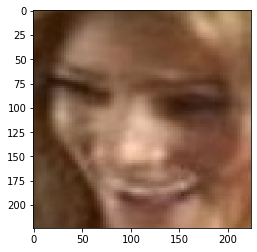

In [ ]:

import matplotlib.pyplot as plt

img = load_img(img_path, target_size=(size,size,3))
plt.imshow(img)

### covert img to numerical data

In [ ]:
img = img_to_array(img)
img = img/255.0
img = img.reshape(1,size,size,3) #array of 1 img only

In [ ]:
img.shape

(1, 224, 224, 3)

In [ ]:
model.predict(img)

array([[0.48584944]], dtype=float32)

In [ ]:
def get_class(data):
  
  probability = model.predict(img)
  pred = np.argmax(probability, axis=1)

  if pred[0] == 0:
      return 'female', probability[0][0]
  else:
      return 'male' ,probability[0][0]
    

In [ ]:
get_class(img)

('female', 0.48584944)

In [ ]:
img2 = '/content/male-female-face-dataset/Validation/female/113102.jpg.jpg'
get_class(img2)

('female', 0.48584944)

In [ ]:
img3 = '/img1.jpg'
get_class(img3_male)

('female', 0.48584944)

using webcam

In [ ]:
import imutils
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

In [ ]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


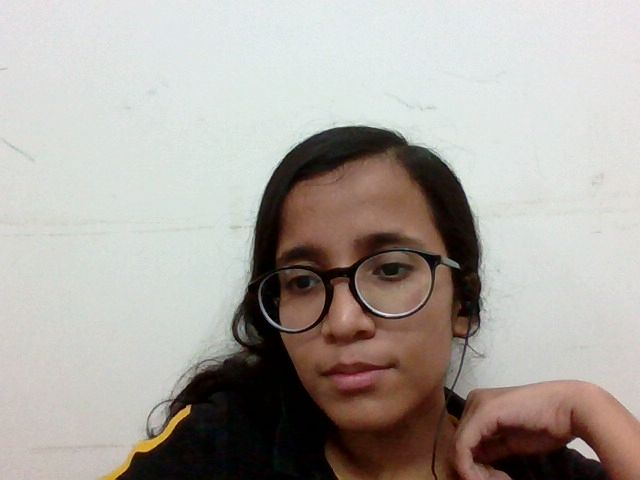

In [ ]:
from IPython.display import Image
try:
  filename=take_photo()
  print('Saved to {}'.format(filename))

  display(Image(filename))
except Exception as err:
  print(str(err))

In [ ]:
# img_pathh = '/content/photo.jpg'

In [ ]:
def get_prediction(img_pathh):
  img = load_img(img_pathh,target_size=(224,224,3))
  plt.imshow(img)
  img = img_to_array(img)
  img = img/255.0
  img = img.reshape(1,224,224,3)
  pred,probability = get_class(img)
  return pred,probability

('female', 0.48584944)

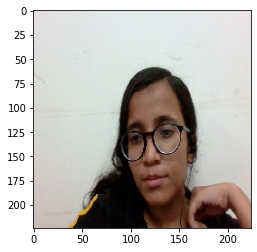

In [ ]:
get_prediction('/content/photo.jpg')

('female', 0.48584944)

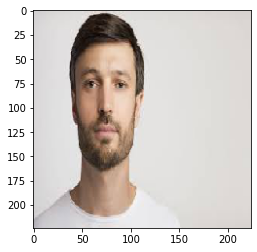

In [ ]:
get_prediction('/content/male.jpg')